In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

# Display the data table for preview
join_data = city_data.merge(ride_data, on="city")
join_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Obtain the x and y coordinates for each of the three city types
data_group = join_data.groupby('city')
avg_fare = data_group['fare'].mean()
rides = data_group['ride_id'].count()
drivers = data_group['driver_count'].mean()
city_type = city_data.set_index('city')['type']
city_df = pd.DataFrame({
    "Average Fare": avg_fare,
    "Number of Rides": rides,
    "Number of Drivers": drivers,
    "Type of City": city_type
})

city_df.head()

,Average Fare,Number of Rides,Number of Drivers,Type of City
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

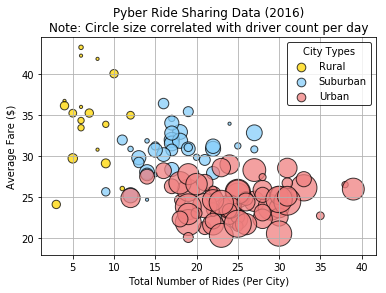

In [3]:
# Build the scatter plots for each city types
rural = city_df[city_df['Type of City'] == 'Rural']
suburban = city_df[city_df['Type of City'] == 'Suburban']
urban = city_df[city_df['Type of City'] == 'Urban']

city_color = {'Urban': ['lightcoral'], 
              'Suburban': ['lightskyblue'], 
              'Rural': ['gold']}

plt.scatter(rural['Number of Rides'], 
            rural['Average Fare'], 
            s = rural['Number of Drivers']*10, 
            color = city_color['Rural'], 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .75)
plt.scatter(suburban['Number of Rides'], 
            suburban['Average Fare'], 
            s = suburban['Number of Drivers']*10, 
            color = city_color['Suburban'], 
            edgecolor = 'black', 
            label = 'Suburban', 
            alpha = .75)
plt.scatter(urban['Number of Rides'], 
            urban['Average Fare'], 
            s = urban['Number of Drivers']*10, 
            color = city_color['Urban'], 
            edgecolor = 'black', 
            label = 'Urban', 
            alpha = .75)


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)\nNote: Circle size correlated with driver count per day')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid()
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/BubbleRideSharing.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

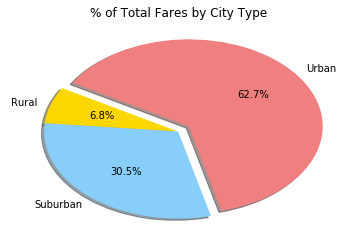

In [5]:
# Calculate Type Percents
type_group = join_data.groupby('type')
total_fares = type_group['fare'].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0 , 0, .1]
plt.pie(total_fares, 
        startangle = 150,
        colors = colors, 
        explode = explode, 
        labels = labels, 
        autopct = "%1.1f%%", shadow = True)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/FaresCityType.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

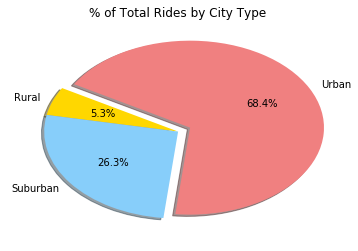

In [7]:
# Calculate Ride Percents
rides_city = type_group['ride_id'].count()
# Build Pie Chart
plt.pie(rides_city, 
        startangle = 150, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%",
        shadow = True)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/TotalRidesCityType.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

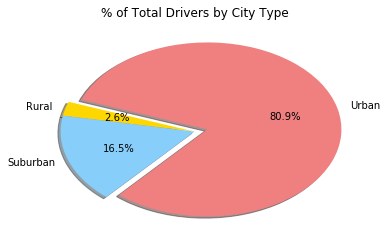

In [9]:
# Calculate Driver Percents
driver_total = city_data.groupby('type').sum()['driver_count']
# Build Pie Charts
plt.pie(driver_total, 
        startangle = 160, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig("../Images/TotalDriversCityType.png")

In [10]:
# Show Figure
plt.show()